In [2]:
# Global toolbox
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import scipy.stats as ss
import yfinance as yf



In [3]:
# Data initialization
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 8, 31)
stock_symbol = 'NVDA'
stocks= yf.download(stock_symbol, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


sample mean: $31.725554026371373
sample standard deviation: $29.64219547894704
sample skewness:  1.8799515494698575
sample kurtosis:  5.771775095018502


<Axes: ylabel='Density'>

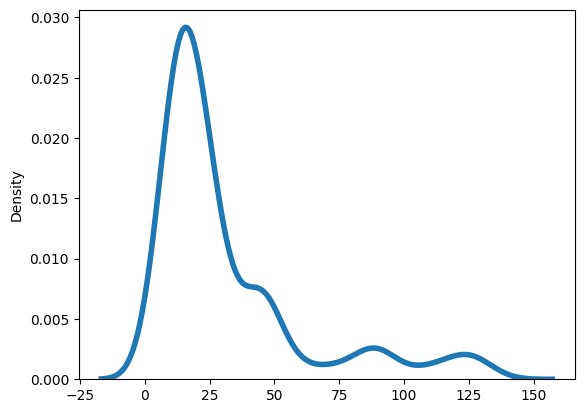

In [4]:
stocks['Adj Close'].describe() # summary statistics
X = stocks['Adj Close'].values
print(f"Mean: ${np.mean(X)}")
print(f"Standard deviation: ${np.std(X)}")
print("Skewness: ",ss.skew(X, axis=0, bias=True))
print("Kurtosis: ",ss.kurtosis(X, axis=0, bias=True)+3)
# Empirical Distribution
sns.kdeplot(data=X,linewidth=4)

In [5]:
"Bootstrap"
T= X.shape[0]
B = 1000 # 5000, 100000 [250 9750]
mu_boot = np.zeros(B)
se_boot = np.zeros(B)
x_boot_std = np.zeros(B)
for i in range(0, B):
     x_boot = X[np.random.choice(T,T)]
     mu_boot[i] = np.mean(x_boot)
     se_boot[i] = np.std(x_boot)/np.sqrt(T) # std of mu_boot
     x_boot_std[i] = np.std(x_boot) # std of x_boot
     # CLT: std(x_boost) = sqrt(T)*std(mu_boot)
mu_boot = np.sort(mu_boot)
se_boot = np.sort(se_boot)
xboot_std = np.sort(x_boot_std)
print("Statistics about the Mean")
print("95% confidence interval of mu_boot:", mu_boot[25], mu_boot[975])
print("95% confidence interval of std_boot of mu :", se_boot[25], se_boot[975])
print("\n")
print("Statistics about the Sample")
print(f"95% confidence interval of {stock_symbol} stock price std (method 1):", se_boot[25]*np.sqrt(T), se_boot[975]*np.sqrt(T))
print(f"95% confidence interval of {stock_symbol} stock price std (method 2):", xboot_std[25], xboot_std[975])

Statistics about the Mean
95% confidence interval of mu_boot: 29.96829802904665 33.391542777495246
95% confidence interval of std_boot of mu : 0.808168583736052 0.9169596117360242


Statistics about the Sample
95% confidence interval of NVDA stock price std (method 1): 27.690832485361238 31.418413825297808
95% confidence interval of NVDA stock price std (method 2): 27.690832485361238 31.418413825297808
